In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/home/knight/Documents/Python Testing/ManningLiveProjects/kMeans2D/'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

/home/knight/Documents/Python Testing/ManningLiveProjects/kMeans2D/Mall_Customers.xls
/home/knight/Documents/Python Testing/ManningLiveProjects/kMeans2D/clusteringTutorial.ipynb
/home/knight/Documents/Python Testing/ManningLiveProjects/kMeans2D/k-means_2d starter solution.ipynb
/home/knight/Documents/Python Testing/ManningLiveProjects/kMeans2D/.ipynb_checkpoints/k-means_2d starter solution-checkpoint.ipynb
/home/knight/Documents/Python Testing/ManningLiveProjects/kMeans2D/.ipynb_checkpoints/clusteringTutorial-checkpoint.ipynb


In [10]:
data = pd.read_csv("/home/knight/Documents/Python Testing/ManningLiveProjects/kMeans2D/Mall_Customers.xls")

In [11]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
#Show column labels
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
#Display data correlations
#data.corr()

data["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [21]:
# sns.countplot(data["Gender"], palette="bone")
# plt.show()

ValueError: could not convert string to float: 'Male'

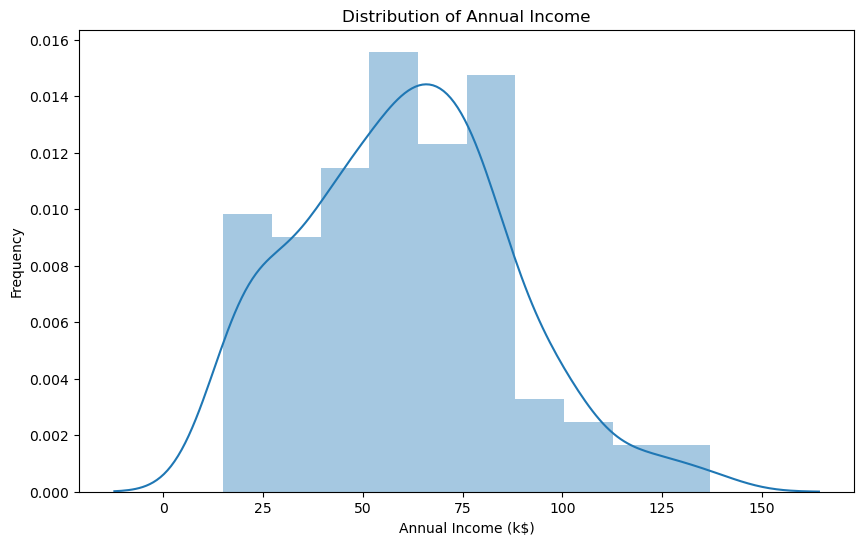

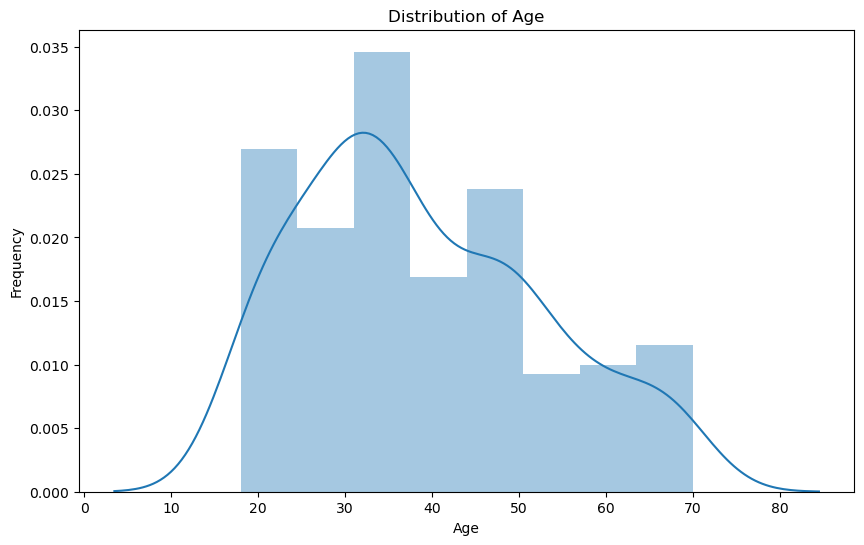

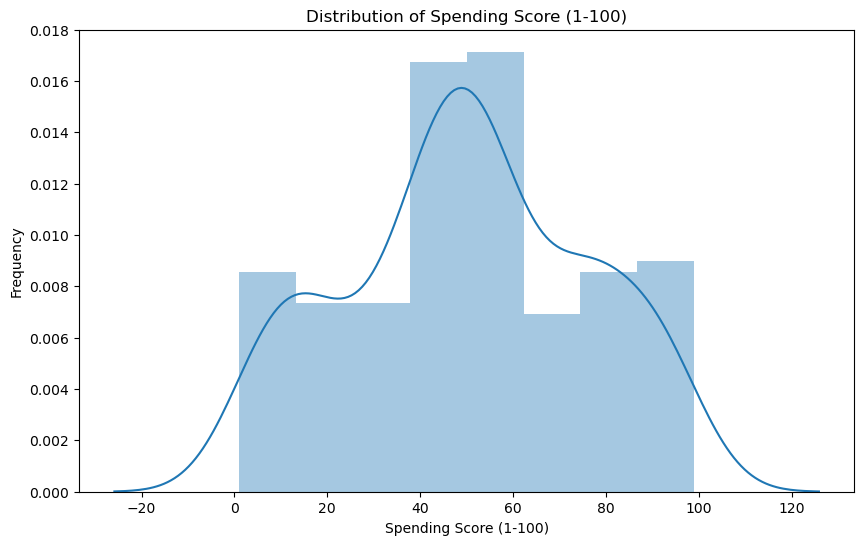

In [22]:
plt.figure(figsize=(10,6))
sns.distplot(data["Annual Income (k$)"])
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
sns.distplot(data["Age"])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
sns.distplot(data["Spending Score (1-100)"])
plt.title("Distribution of Spending Score (1-100)")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Frequency")
plt.show()

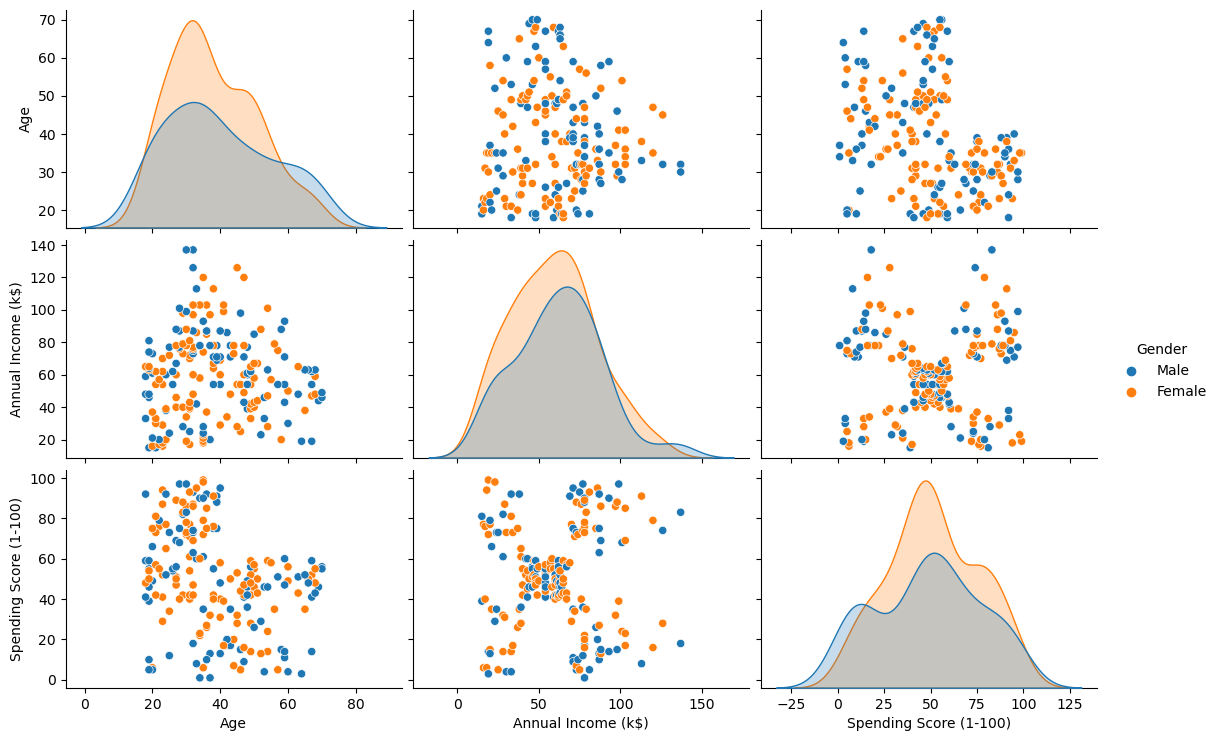

In [23]:
sns.pairplot(data.drop('CustomerID',axis =1), hue='Gender', aspect = 1.5)
plt.show()

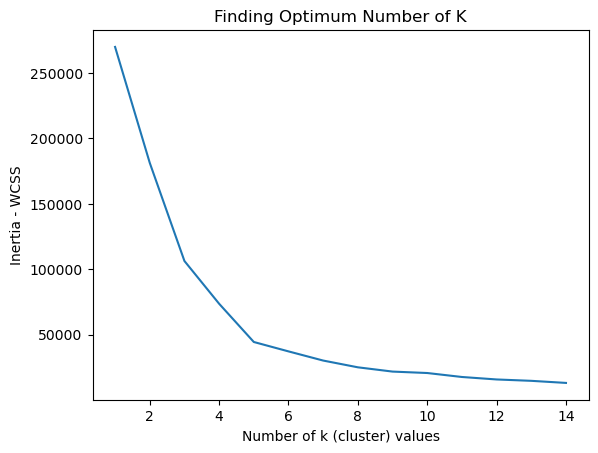

In [28]:
from sklearn.cluster import KMeans
x_data1 = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[:, :].values
wcss = []
for k in range(1,15):
    kmean = KMeans(n_clusters=k, random_state=0)
    kmean.fit(x_data1)
    wcss.append(kmean.inertia_)   #Within Cluster Sum of Square
plt.plot(range(1,15),wcss)
plt.xlabel("Number of k (cluster) values")
plt.ylabel("Inertia - WCSS")
plt.title("Finding Optimum Number of K")
plt.show()

In [29]:
kmean_x_data1 = KMeans(n_clusters=5, random_state=0)
clusters = kmean_x_data1.fit_predict(x_data1)
data["Label1"] = clusters

In [30]:
data.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label1
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3


In [31]:
#Segment according to income and spending score

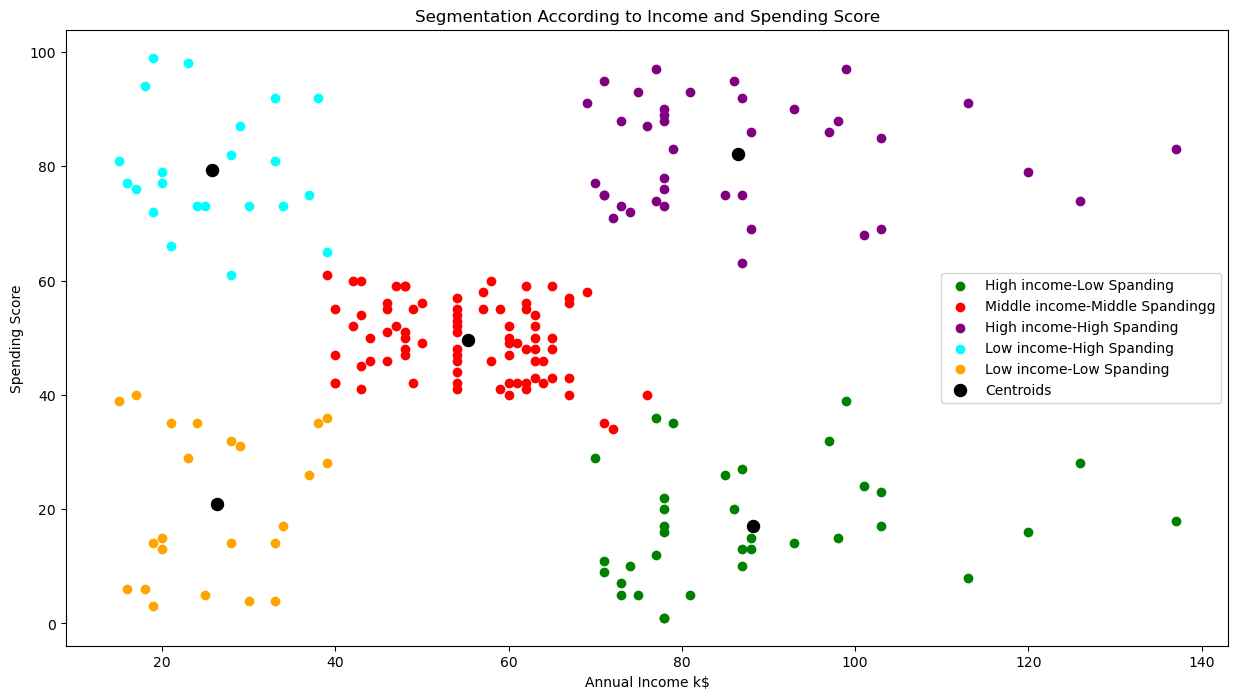

In [32]:
plt.figure(figsize=(15,8))
plt.scatter(x_data1[clusters == 0,0 ],x_data1[clusters == 0,1 ],color = "green", label = "High income-Low Spanding")
plt.scatter(x_data1[clusters == 1,0 ],x_data1[clusters == 1,1 ],color = "red", label = "Middle income-Middle Spandingg")
plt.scatter(x_data1[clusters == 2,0 ],x_data1[clusters == 2,1 ],color = "purple", label = "High income-High Spanding")
plt.scatter(x_data1[clusters == 3,0 ],x_data1[clusters == 3,1 ],color = "cyan", label = "Low income-High Spanding")
plt.scatter(x_data1[clusters == 4,0 ],x_data1[clusters == 4,1 ],color = "orange", label = "Low income-Low Spanding")
plt.scatter(kmean_x_data1.cluster_centers_[:,0], kmean_x_data1.cluster_centers_[:,1], color="black", label="Centroids",s =75)#0,1 x and y axis
plt.xlabel("Annual Income k$")
plt.ylabel("Spending Score")
plt.legend()
plt.title("Segmentation According to Income and Spending Score")
plt.show()

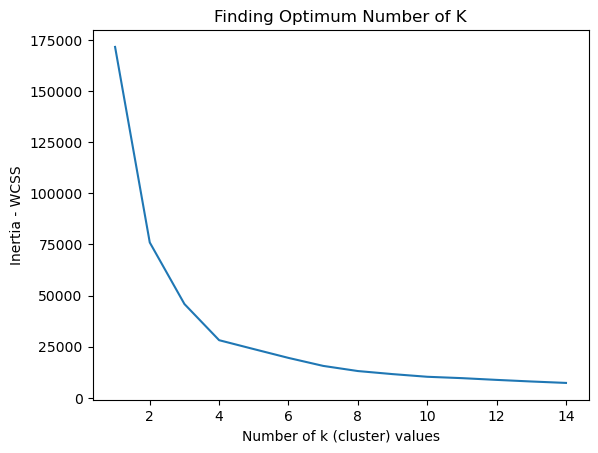

In [36]:
#Looking for optimal cluster number for the relationship between Age and Spending Score
from sklearn.cluster import KMeans
x_data2 = data[['Age','Spending Score (1-100)']].iloc[:,:].values
wcss2 =[]
for k in range(1,15):
    kmean2 = KMeans(n_clusters=k, random_state=0)
    kmean2.fit(x_data2)
    wcss2.append(kmean2.inertia_)

plt.plot(range(1,15),wcss2)
plt.xlabel("Number of k (cluster) values")
plt.ylabel("Inertia - WCSS")
plt.title("Finding Optimum Number of K")
plt.show()

In [37]:
kmean_x_data2 = KMeans(n_clusters=4, random_state=0)
clusters2 = kmean_x_data2.fit_predict(x_data2)
data["Label2"] = clusters2

In [38]:
data.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label1,Label2
0,1,Male,19,15,39,4,2
1,2,Male,21,15,81,3,1


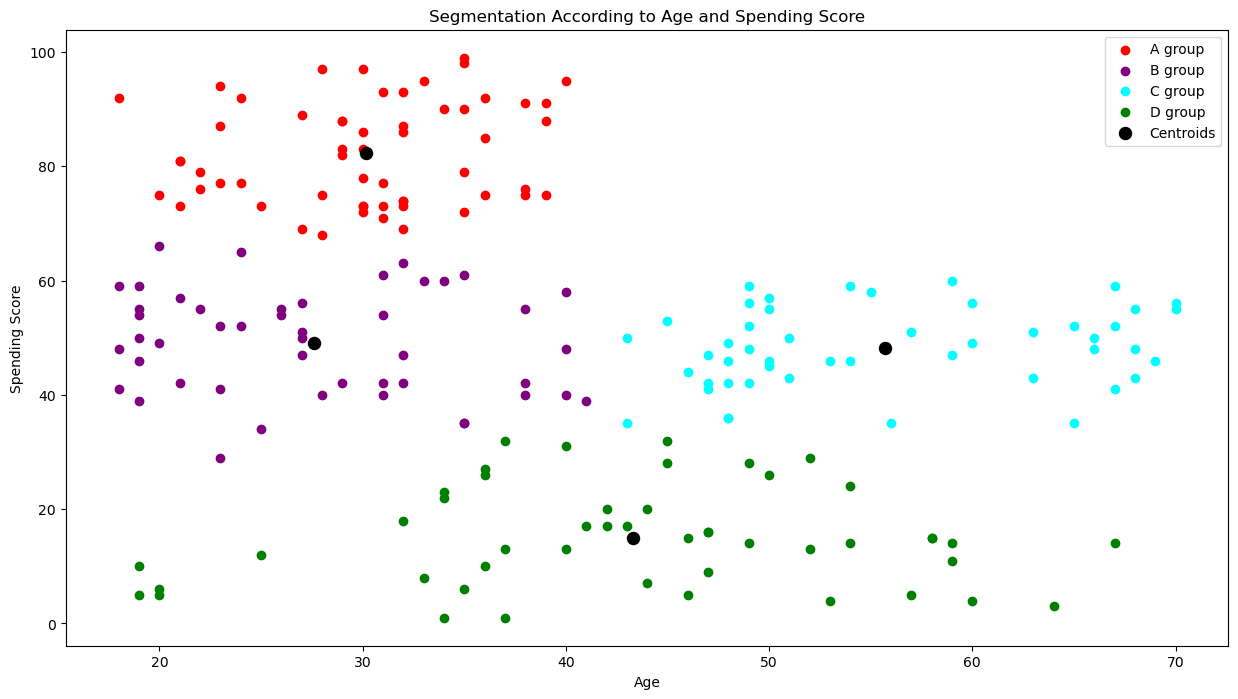

In [39]:
#Segmentation by age and spending score
plt.figure(figsize=(15,8))
plt.scatter(x_data2[clusters2 == 1,0 ],x_data2[clusters2 == 1,1 ],color = "red", label = "A group")
plt.scatter(x_data2[clusters2 == 2,0 ],x_data2[clusters2 == 2,1 ],color = "purple", label = "B group")
plt.scatter(x_data2[clusters2 == 3,0 ],x_data2[clusters2 == 3,1 ],color = "cyan", label = "C group")
plt.scatter(x_data2[clusters2 == 0,0 ],x_data2[clusters2 == 0,1 ],color = "green", label = "D group")
plt.scatter(kmean_x_data2.cluster_centers_[:,0], kmean_x_data2.cluster_centers_[:,1], color="black", label="Centroids", s=75)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend()
plt.title("Segmentation According to Age and Spending Score")
plt.show()